In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from helpers import (get_training_observations, 
                     get_training_labels)

import pandas as pd
import numpy as np
# Visualization/Processing
%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from mpl_toolkits.mplot3d import Axes3D


In [2]:
# Get training data
x_train = get_training_observations()
y_train = get_training_labels()

Getting all training observations from 'metagenome_classification.db'...
Getting all training labels from 'metagenome_classification.db'...


In [3]:
svd = TruncatedSVD(n_components=3, n_iter=7, random_state=27)
svd.fit(x_train)

svd_x_train = svd.transform(x_train)
df_3d = pd.DataFrame(svd_x_train)

<IPython.core.display.Javascript object>


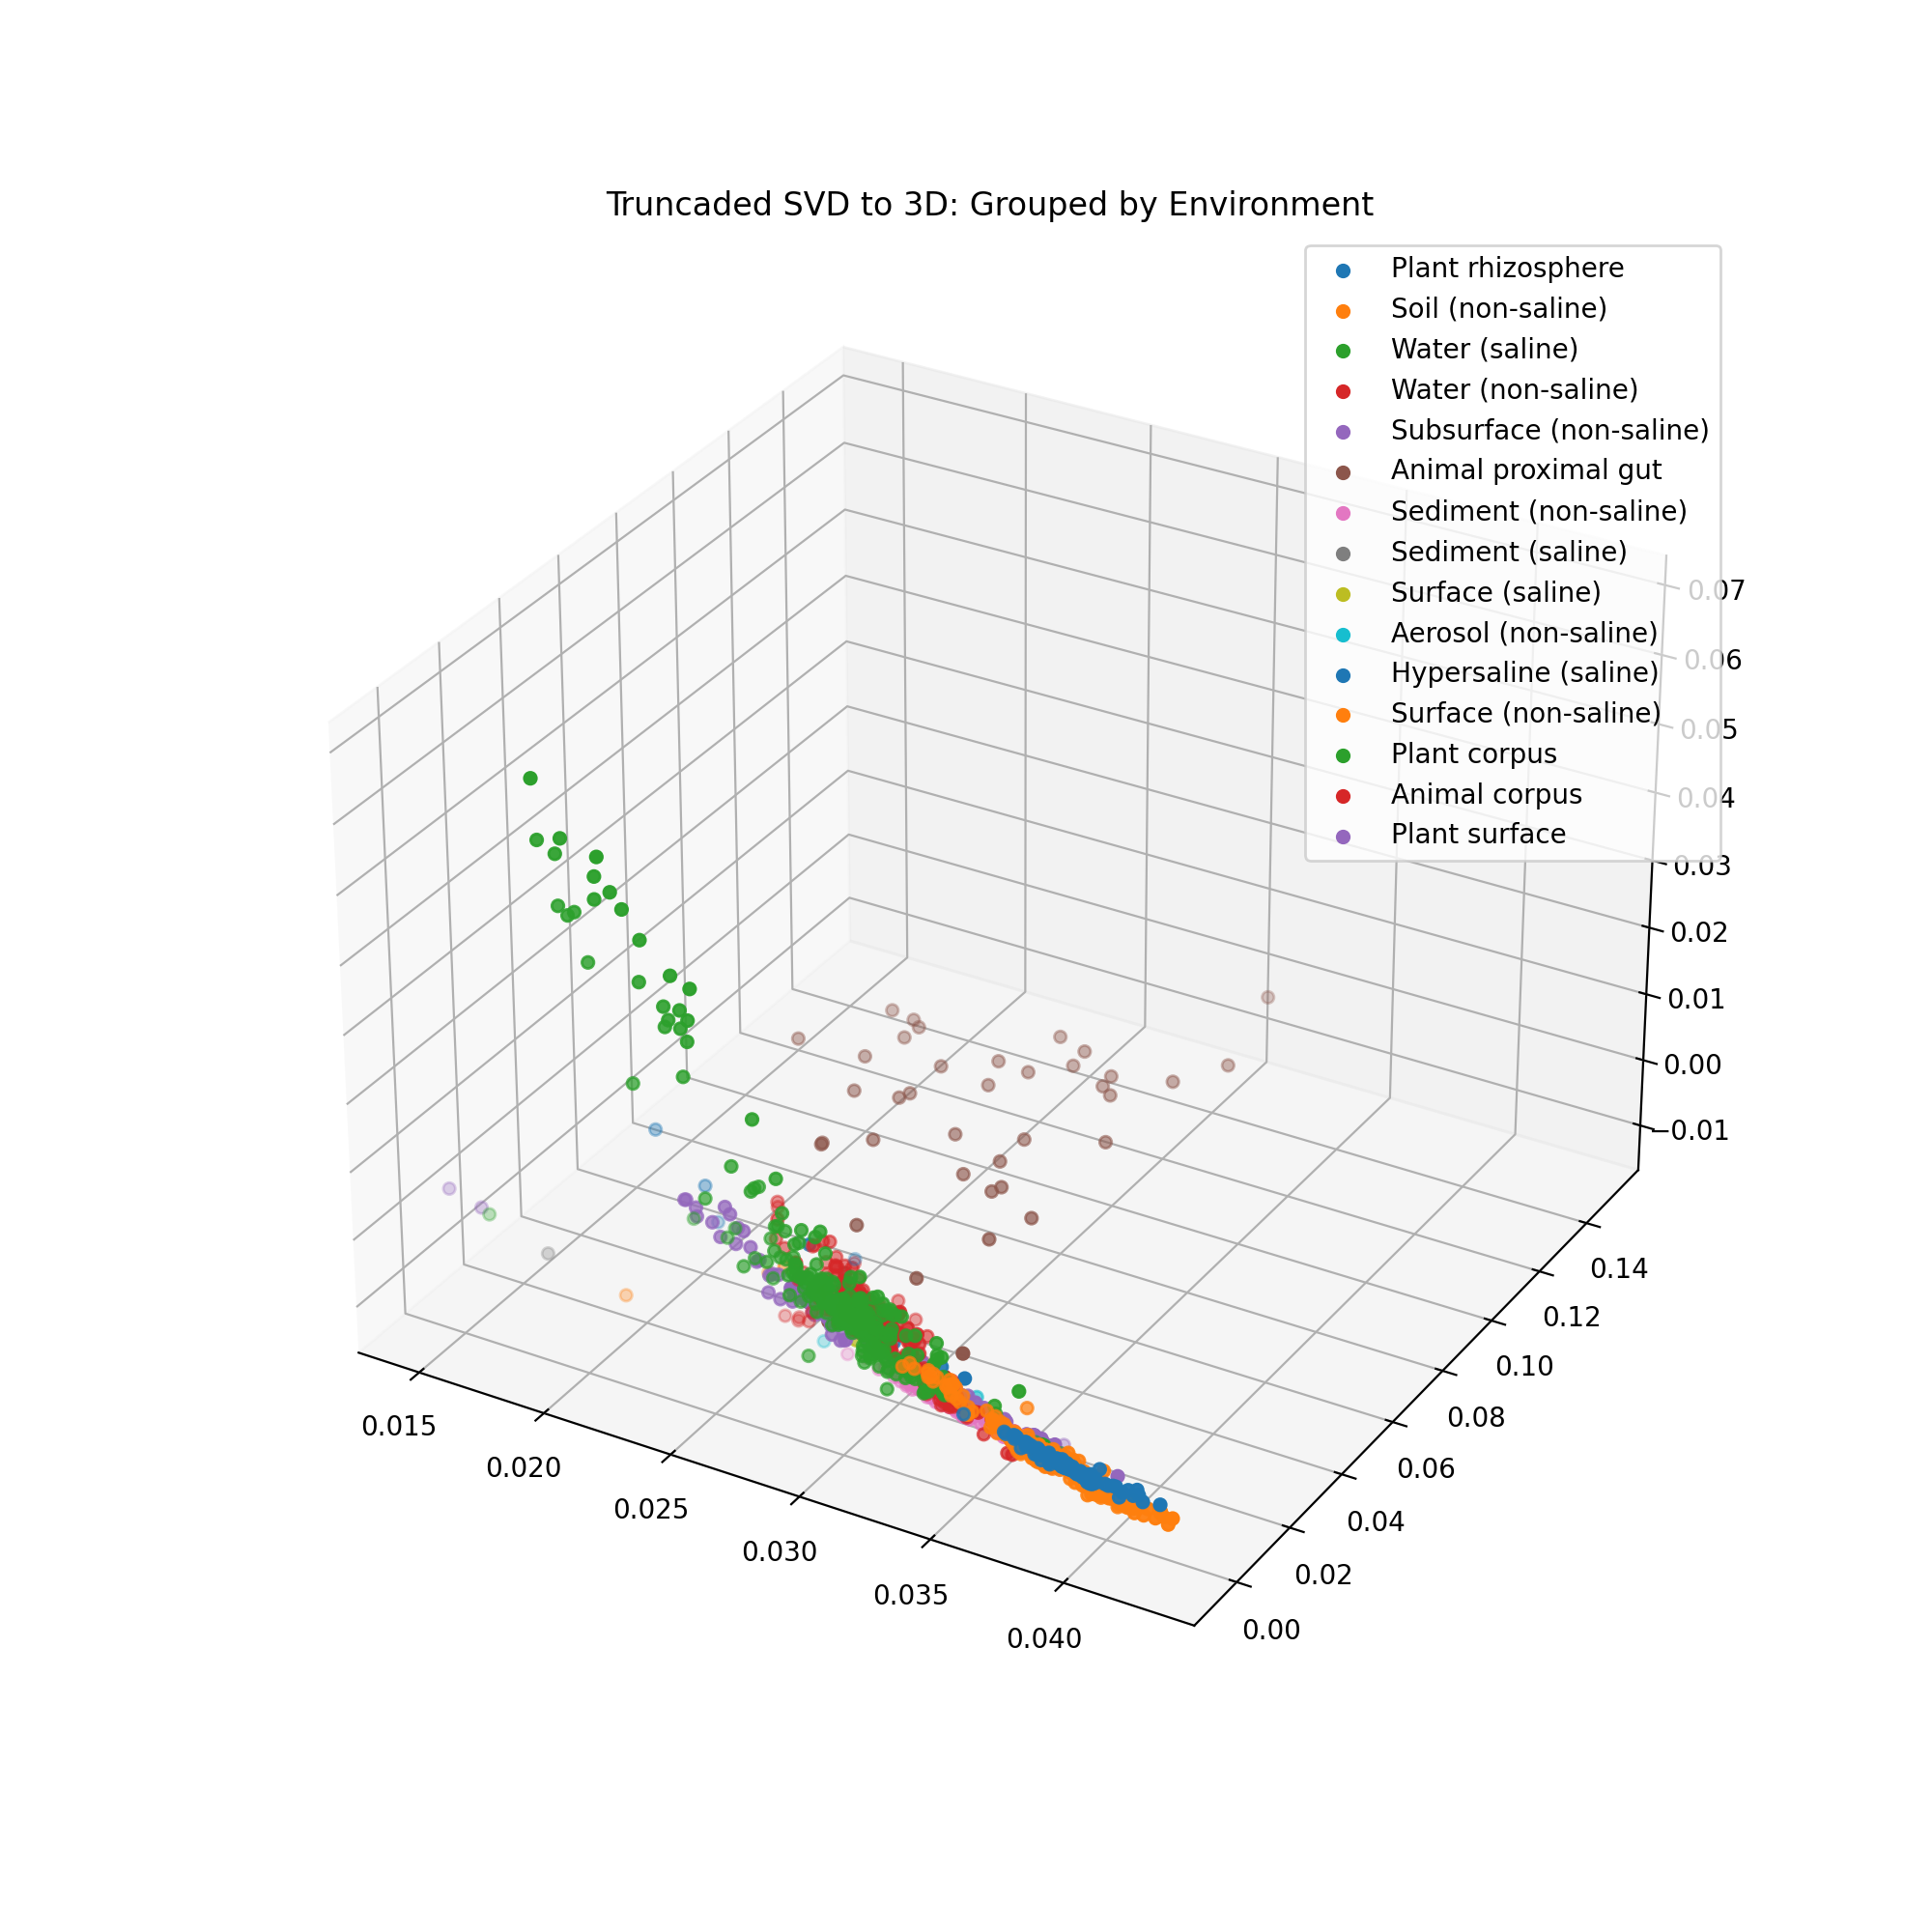

In [4]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')

for lab in y_train['EMPO_3'].unique():
    x = df_3d.loc[list(y_train['EMPO_3'] == lab), 0]
    y = df_3d.loc[list(y_train['EMPO_3'] == lab), 1]
    z = df_3d.loc[list(y_train['EMPO_3'] == lab), 2]
    ax.scatter(list(x), list(y), list(z), label=lab)
    
ax.set_title("Truncaded SVD to 3D: Grouped by Environment")
ax.legend(loc="best")

plt.show()